In [ ]:
!pip install gensim spacy nltk

In [ ]:
import gensim
import re
import spacy

In [ ]:
# Download via terminal commands
!wget "https://bakrianoo.ewr1.vultrobjects.com/aravec/full_grams_cbow_100_twitter.zip"
!unzip "full_grams_cbow_100_twitter.zip"

--2022-05-17 20:57:32--  https://bakrianoo.ewr1.vultrobjects.com/aravec/full_grams_cbow_100_twitter.zip
Resolving bakrianoo.ewr1.vultrobjects.com (bakrianoo.ewr1.vultrobjects.com)... 108.61.0.122, 2001:19f0:0:22::100
Connecting to bakrianoo.ewr1.vultrobjects.com (bakrianoo.ewr1.vultrobjects.com)|108.61.0.122|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1131904811 (1.1G) [application/zip]
Saving to: ‘full_grams_cbow_100_twitter.zip.1’

full_grams_cbow_100 100%[===================>]   1.05G  44.5MB/s    in 28s     

2022-05-17 20:58:00 (39.2 MB/s) - ‘full_grams_cbow_100_twitter.zip.1’ saved [1131904811/1131904811]

Archive:  full_grams_cbow_100_twitter.zip
replace full_grams_cbow_100_twitter.mdl? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: full_grams_cbow_100_twitter.mdl  
replace full_grams_cbow_100_twitter.mdl.trainables.syn1neg.npy? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace full_grams_cbow_100_twitter.mdl.wv.vectors.npy? [y]es, [n]o, [A]ll, 

In [ ]:
# load the AraVec model
model = gensim.models.Word2Vec.load("full_grams_cbow_100_twitter.mdl")
print("We've",len(model.wv.index2word),"vocabularies")

We've 1476715 vocabularies


In [ ]:
import pandas as pd

read_file = pd.read_csv('/content/all.dev.features.txt',sep=" ",header=None)
read_file.to_csv('all_csv.csv', index=None)

In [ ]:
data = pd.read_csv('/content/all_csv.csv')

In [ ]:
df = data['0'].str.split(pat='\t',expand=True)
data = pd.DataFrame({'data':df[0], 'lables':df[df.shape[1]-1]})

In [ ]:
correct_labels = {
    # Incorrect classes
    "B-ERS": "B-PERS",
    "B-MSIC": "B-MISC",
    "B-OEG": "B-ORG",
    "B-ORF": "B-ORG",
    "B-PERs": "B-PERS",
    "B-PRG": "B-ORG",
    "I-PRG": "I-ORG",
    "IPERS": "I-PERS",
    "": "O",
    "o": "O",
    "B-MIS0": "B-MISC",
    "B-MIS1": "B-MISC",
    "B-MIS2": "B-MISC",
    "B-MIS3": "B-MISC",
    "I-MIS0": "I-MISC",
    "I-MIS1": "I-MISC",
    "I-MIS2": "I-MISC",
    "I-MIS3": "I-MISC",
    "B-SPANISH": "O",
    "I-SPANISH": "O",
    "B-MIS": "B-MISC",
    "I-MIS": "B-MISC",
    "B-MIS-2": "B-MISC",
    "B-MIS-1": "B-MISC",
    "B-MIS1'": "B-MISC",
    "I-MIS": "I-MISC",
    "OO": "O",
    "I--ORG": "I-ORG",
    "B-MISS1": "B-MISC",
    "IO": "O",
    "B-ENGLISH": "O",
    "B-PER": "B-PERS",
    "I-PER": "I-PERS",
    
    # Correct classes
    "B-LOC": "B-LOC",
    "O": "O",
    "B-ORG": "B-ORG",
    "I-ORG": "I-ORG",
    "B-PERS": "B-PERS",
    "I-PERS": "I-PERS",
    "I-LOC": "I-LOC",
    "I-MISC": "I-MISC",
    "B-MISC": "B-MISC",
}

In [ ]:
data["lables"] = data["lables"].map(correct_labels)
# Removes the remaining unmapped classes
# Drop words that were mis-parsed from class
data.drop([item for item in data.index if pd.isnull(data["lables"][item]) or data["data"][item] in correct_labels.keys()], inplace=True)

In [ ]:
print("Unique words in corpus:", data['data'].nunique())
print("Unique lables in corpus:", data['lables'].nunique())

Unique words in corpus: 6921
Unique lables in corpus: 9


In [ ]:
# words = list(set(data["data"].values))
# words.append("ENDPAD")
# num_words = len(words)
# tags = list(set(data["lables"].values))
# num_tags = len(tags)

In [ ]:
list_data=data.values.tolist()
print(list_data)

[['الذرة', 'O'], ['هي', 'O'], ['أصغر', 'O'], ['جزء', 'O'], ['من', 'O'], ['العنصر', 'O'], ['الكيميائي', 'O'], ['الذي', 'O'], ['يحتفظ', 'O'], ['بالخصائص', 'O'], ['الكيميائية', 'O'], ['لذلك', 'O'], ['العنصر', 'O'], ['.', 'O'], ['يرجع', 'O'], ['أصل', 'O'], ['كلمة', 'O'], ['ذرة', 'O'], ['إلى', 'O'], ['الكلمة', 'O'], ['الإغريقية', 'O'], ['أتوموس', 'B-MISC'], ['،', 'O'], ['وتعني', 'O'], ['غير', 'O'], ['القابل', 'O'], ['للانقسام؛', 'O'], ['إذ', 'O'], ['كان', 'O'], ['يعتقد', 'O'], ['أنه', 'O'], ['ليس', 'O'], ['ثمة', 'O'], ['ما', 'O'], ['هو', 'O'], ['أصغر', 'O'], ['من', 'O'], ['الذرة', 'O'], ['.', 'O'], ['تتكون', 'O'], ['الذرة', 'O'], ['من', 'O'], ['سحابة', 'O'], ['من', 'O'], ['الشحنات', 'O'], ['السالبة', 'O'], ['(', 'O'], ['الإلكترونات', 'B-MISC'], [')', 'O'], ['تحوم', 'O'], ['حول', 'O'], ['نواة', 'O'], ['موجبة', 'O'], ['الشحنة', 'O'], ['صغيرة', 'O'], ['جدا', 'O'], ['في', 'O'], ['الوسط', 'O'], ['.', 'O'], ['تتكون', 'O'], ['النواة', 'O'], ['الموجبة', 'O'], ['هذه', 'O'], ['من', 'O'], ['بروتونات',

In [ ]:
columns = list(zip(*list_data))
word_list=list(columns[0])
lables_list=list(columns[1])

In [ ]:
def remove_punc(string):
    punc = '''!()-[]{};:'"\,،<>/?@#$%^&*x−×-=+_~psl1234567890'''
    for ele in string:  
        if ele in punc:  
            string = string.replace(ele, "")
            del() 
    return string

In [ ]:
word_list = [remove_punc(i) for i in word_list]

In [ ]:
word_list_cleaned = []
import re
for i in range(len(word_list)):
  word_list_cleaned.append(re.sub('([@A-Za-z0-9_]+)|#|http\S+', '', word_list[i])) # cleaning up

In [ ]:
lables_list_update = []
for i in range(len(lables_list)):
  if word_list_cleaned[i] != '':
    lables_list_update.append(lables_list[i])

In [ ]:
word_list_cleaned = ' '.join(word_list_cleaned).split()

In [ ]:
word_list_cleaned[0]

'الذرة'

In [ ]:
sent_lable_lists = [[]]
sent_lists = [[]]
for i in range(len(word_list_cleaned)):
    if word_list_cleaned[i] == '.':
        sent_lists.append([])
        sent_lable_lists.append([])
    else:
        sent_lable_lists[-1].append(lables_list_update[i])
        sent_lists[-1].append(word_list_cleaned[i])

In [ ]:
print(sent_lable_lists)
print(sent_lists)

[['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-MISC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-MISC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], ['O', 'O', 'O', 'O', 'O', 'B-MISC', 'O', 'O', 'O', 'B-MISC', 'O'], ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], ['O', 'O', 'O', 'O', 'B-MISC', 'O', 'O', 'B-MISC', 'O', 'B-MISC', 'O', 'O', 'O', 'B-MISC', 'O', 'O', 'O', 'O', 'O', 'O'], ['O', 'O', 'O', 'O', 'O', 'O', 'B-MISC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O

In [ ]:
Sent=[]
for i in range(len(word_list_cleaned)):
  xx=[]
  xx.append(word_list_cleaned[i])
  xx.append(lables_list_update[i])
  Sent.append((xx))


In [ ]:
print(Sent)

[['الذرة', 'O'], ['هي', 'O'], ['أصغر', 'O'], ['جزء', 'O'], ['من', 'O'], ['العنصر', 'O'], ['الكيميائي', 'O'], ['الذي', 'O'], ['يحتفظ', 'O'], ['بالخصائص', 'O'], ['الكيميائية', 'O'], ['لذلك', 'O'], ['العنصر', 'O'], ['.', 'O'], ['يرجع', 'O'], ['أصل', 'O'], ['كلمة', 'O'], ['ذرة', 'O'], ['إلى', 'O'], ['الكلمة', 'O'], ['الإغريقية', 'O'], ['أتوموس', 'B-MISC'], ['وتعني', 'O'], ['غير', 'O'], ['القابل', 'O'], ['للانقسام؛', 'O'], ['إذ', 'O'], ['كان', 'O'], ['يعتقد', 'O'], ['أنه', 'O'], ['ليس', 'O'], ['ثمة', 'O'], ['ما', 'O'], ['هو', 'O'], ['أصغر', 'O'], ['من', 'O'], ['الذرة', 'O'], ['.', 'O'], ['تتكون', 'O'], ['الذرة', 'O'], ['من', 'O'], ['سحابة', 'O'], ['من', 'O'], ['الشحنات', 'O'], ['السالبة', 'O'], ['الإلكترونات', 'B-MISC'], ['تحوم', 'O'], ['حول', 'O'], ['نواة', 'O'], ['موجبة', 'O'], ['الشحنة', 'O'], ['صغيرة', 'O'], ['جدا', 'O'], ['في', 'O'], ['الوسط', 'O'], ['.', 'O'], ['تتكون', 'O'], ['النواة', 'O'], ['الموجبة', 'O'], ['هذه', 'O'], ['من', 'O'], ['بروتونات', 'B-MISC'], ['موجبة', 'O'], ['الشحنة

In [ ]:
Sent_list=[[]]

In [ ]:
for i in range(len(Sent)):
   if Sent[i][0] == '.':
     Sent_list.append([])
   else:
    Sent_list[-1].append(tuple(Sent[i]))
   

In [ ]:
print(len(Sent_list))

633


In [ ]:
word2idx = {w: i + 1 for i, w in enumerate(word_list_cleaned)}
tag2idx = {t: i for i, t in enumerate(lables_list_update)}

In [ ]:
len(word_list_cleaned)

18666

In [ ]:

print(tag2idx)

{'O': 18665, 'B-MISC': 18659, 'I-MISC': 18660, 'B-PERS': 18450, 'I-PERS': 18409, 'B-LOC': 16680, 'I-LOC': 16678, 'B-ORG': 18175, 'I-ORG': 18176}


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 50

X = [[word2idx[w[0]] for w in s] for s in Sent_list]
X = pad_sequences(maxlen=max_len, sequences=X, padding="post", value=len(word_list_cleaned)-1)

y = [[tag2idx[w[1]] for w in s] for s in Sent_list]
y = pad_sequences(maxlen=max_len, sequences=y, padding="post", value=tag2idx["O"])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

506
127
506
127


In [ ]:
model[word_list_cleaned[1]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([-2.4319282e-01,  4.0879068e+00, -3.1353936e+00,  5.9956260e-02,
       -4.1635171e-01,  4.2721820e+00,  3.3861572e-05, -1.6132358e-01,
        1.9446223e+00,  1.2348921e+00, -3.0830228e+00,  1.2591254e+00,
        3.3000660e+00,  1.9770839e+00, -7.6922065e-01, -3.7119746e+00,
       -5.5515635e-01, -2.1235845e+00,  2.4543209e+00, -1.7344509e+00,
       -7.0454276e-01, -3.5545430e+00, -5.4060421e+00,  5.9016550e-01,
       -8.9479990e-02,  2.1806401e-01, -2.3470688e+00, -2.5383573e+00,
        3.3289909e-01, -3.3333282e+00, -9.8925692e-01,  3.1500992e-01,
        1.6066968e+00, -3.6605597e-01, -2.8456521e+00,  3.1417899e+00,
        3.8697834e+00,  1.6030514e+00, -4.8219749e-01,  3.3781281e-01,
        1.0049454e+00,  1.1704849e+00,  2.5190427e+00,  1.3061903e+00,
        4.1919526e-01,  4.2315874e+00,  5.8207577e-01, -6.0798913e-01,
       -1.5159211e+00,  6.3127112e-01,  6.4448071e-01,  2.1186235e+00,
       -1.5490245e+00, -8.3250850e-01,  1.3521003e+00, -2.8301327e+00,
      

In [ ]:
for j, word in enumerate(word_list_cleaned):
        try:
            word_list_cleaned[j] = model[word]
        except KeyError:
            word_list_cleaned[j] = model['مجهول']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


# LSTM Model

In [ ]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import LSTM, Embedding, Dense
from tensorflow.keras.layers import TimeDistributed, SpatialDropout1D, Bidirectional

In [ ]:
#embedding_layer = Embedding(input_dim=len(word_list_cleaned),output_dim=100,weights=[word_list_cleaned] , input_length=100,trainable=False)

input_word = Input(shape=(50,))
model = Embedding(input_dim=len(word_list_cleaned),output_dim=50,weights=word_list_cleaned , input_length=50,trainable=False)(input_word)
model = SpatialDropout1D(0.1)(model)
model = Bidirectional(LSTM(units=100, return_sequences=True, recurrent_dropout=0.1))(model)
out = TimeDistributed(Dense(len(lables_list_update), activation="softmax"))(model)
model = Model(input_word, out)
model.summary()

ValueError: ignored

In [ ]:
input_word = Input(shape=(max_len,))
model = Embedding(input_dim=len(word_list_cleaned), output_dim=50, input_length=max_len)(input_word)
model = SpatialDropout1D(0.1)(model)
model = Bidirectional(LSTM(units=100, return_sequences=True, recurrent_dropout=0.1))(model)
out = TimeDistributed(Dense(len(lables_list_update), activation="softmax"))(model)
model = Model(input_word, out)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 50)]              0         
                                                                 
 embedding_1 (Embedding)     (None, 50, 50)            933300    
                                                                 
 spatial_dropout1d (SpatialD  (None, 50, 50)           0         
 ropout1D)                                                       
                                                                 
 bidirectional (Bidirectiona  (None, 50, 200)          120800    
 l)                                                              
                                                                 
 time_distributed (TimeDistr  (None, 50, 18666)        3751866   
 ibuted)                                                         
                                                             

In [ ]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
pip install livelossplot

     |████████████████████████████████| 793 kB 9.7 MB/s 
     |████████████████████████████████| 381 kB 51.6 MB/s 
  Attempting uninstall: prompt-toolkit
    Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Attempting uninstall: ipython
    Found existing installation: ipython 5.5.0
    Uninstalling ipython-5.5.0:
      Successfully uninstalled ipython-5.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-toolkit 3.0.29 which is incompatible.
google-colab 1.0.0 requires ipython~=5.5.0, but you have ipython 7.33.0 which is incompatible.


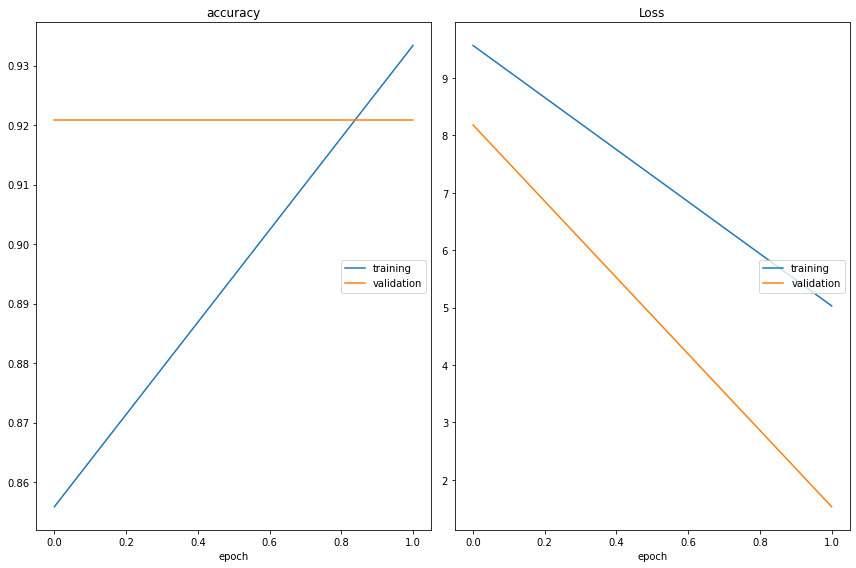

accuracy
	training         	 (min:    0.856, max:    0.933, cur:    0.933)
	validation       	 (min:    0.921, max:    0.921, cur:    0.921)
Loss
	training         	 (min:    5.030, max:    9.569, cur:    5.030)
	validation       	 (min:    1.530, max:    8.184, cur:    1.530)

Epoch 2: val_loss improved from 8.18358 to 1.52966, saving model to model_weights.h5
16/16 [==============================] - 40s 3s/step - loss: 5.0304 - accuracy: 0.9334 - val_loss: 1.5297 - val_accuracy: 0.9208


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from livelossplot.tf_keras import PlotLossesCallback


chkpt = ModelCheckpoint("model_weights.h5", monitor='val_loss',verbose=1, save_best_only=True, save_weights_only=True, mode='min')

early_stopping = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=1, verbose=0, mode='max', baseline=None, restore_best_weights=False)

callbacks = [PlotLossesCallback(), chkpt, early_stopping]

history = model.fit(
    x=x_train,
    y=y_train,
    validation_data=(x_test,y_test),
    batch_size=32, 
    epochs=3,
    callbacks=callbacks,
    verbose=1
)

In [ ]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 6s 1s/step - loss: 1.5297 - accuracy: 0.9208


[1.5296584367752075, 0.9207873940467834]

In [ ]:
i = np.random.randint(0, x_test.shape[0]) #659
Y_Pred = model.predict(np.array([x_test[i]]))

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

print('Precision: %.3f' % precision_score(y_test, Y_Pred))

print('Recall: %.3f' % recall_score(y_test, Y_Pred))

print('Accuracy: %.3f' % accuracy_score(y_test, Y_Pred))

print('F1 Score: %.3f' % f1_score(y_test, Y_Pred))

In [ ]:
import numpy as np
i = np.random.randint(0, x_test.shape[0]) #659
p = model.predict(np.array([x_test[i]]))
p = np.argmax(p, axis=-1)
y_true = y_test[i]
print("{:15}{:5}\t {}\n".format("Word", "True", "Pred"))
print("-" *30)
for w, true, pred in zip(x_test[i], y_true, p[0]):
    print((word_list_cleaned[w-1], lables_list_update[true], lables_list_update[pred]))

Word           True 	 Pred

------------------------------
(array([-5.33009171e-01,  4.20380205e-01,  9.91767108e-01,  1.18819046e+00,
       -5.66069961e-01, -8.16303849e-01, -2.97343373e-01,  2.10844487e-01,
       -9.38625216e-01, -9.48507249e-01, -1.19849288e+00,  2.65632927e-01,
        7.50258923e-01,  4.53845024e-01, -5.12428701e-01,  3.79596293e-01,
        2.37770009e+00,  8.28943670e-01, -6.53331399e-01,  1.08327842e+00,
        6.23009920e-01, -1.17538512e+00, -1.07148856e-01, -4.29574877e-01,
        7.79699147e-01,  2.55746990e-01,  6.74843431e-01,  1.49880558e-01,
        1.98453054e-01,  1.02426493e+00, -2.18405724e+00,  3.94958705e-01,
       -4.04316932e-01, -9.49902654e-01, -1.71409309e+00, -1.00091684e+00,
        2.38694802e-01, -2.17741624e-01, -4.61255103e-01,  6.04230344e-01,
       -4.87789243e-01,  5.77095807e-01,  7.95331895e-01, -9.84519839e-01,
       -8.70338917e-01,  2.31389809e+00,  3.35017949e-01,  1.73261952e+00,
       -1.06530344e+00, -1.23447275e+00,